In [4]:
#restore damaged image
import numpy as np
import cv2

img = cv2.imread('cat_damaged.png')
mask = cv2.imread('cat_mask.png', 0)
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
cv2.imwrite('cat_inpainted.png', dst)

In [3]:
#removing object
from PIL import Image
import numpy as np	

img = Image.open('website.jfif').convert('RGB')
img_arr = np.array(img)
img_arr[0 : 400, 0 : 400] = (0, 0, 0)
img = Image.fromarray(img_arr)
img.show()

In [2]:
#restoration
import cv2
import numpy as np
from skimage import io     

frame = cv2.cvtColor(io.imread('crop.png'), cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(io.imread('nature.jpg'), cv2.COLOR_RGB2BGR)
mask = 255 * np.uint8(np.all(frame == [36, 28, 237], axis=2))
contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnt = min(contours, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(cnt)
frame[y:y+h, x:x+w] = cv2.resize(image, (w, h))
cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
pip install keras_ocr

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=f39d0baea6bc4cb1663dafb57823f932ffebe3f65199ec23762293de29f3f1c7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


True

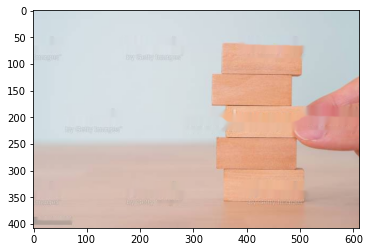

In [7]:
#removing text
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
import tensorflow as tf
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read('textremove.jpg')
    # generate (word, box) tuples
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]
       
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
       
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
       
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

img_text_removed = inpaint_text('../input/traffic-sign/traffic signs/1.jpg', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

In [ ]:
#removing logo
